In [1]:
# Importing the required libraries for the problem
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
from scipy import special 

# Question 4

## Case 1: Highly Correlated Matrix

#### Creation of Correlated Matrix 

In [2]:
np.random.seed(10)
X = np.random.random_sample(100)
A = []
A.append(X)

for i in range(99):
    p = 0.999 #(Correlation)
    Y = []
    for x in X:
# Creating y variables with mean = px and variance = 1-p^2 using the F inverse formula using the erf inverse fn.
        Y.append(p*x + np.sqrt((1-p**2)*2)*special.erfinv(2*np.random.uniform(0,1,1)-1))
    Y = np.ravel(Y)
    Y = (Y - min(Y))/max(Y - min(Y)) # Normalizing the Y values so that they are between 0 and 1
    A.append(np.array(Y)) # Appending the individual features to the matrix
    
A = np.matrix(A)

In [3]:
# We can see that the columns of A are highly correlated
np.corrcoef(A)

array([[1.        , 0.98937188, 0.98681353, ..., 0.98237677, 0.98664962,
        0.989341  ],
       [0.98937188, 1.        , 0.9787438 , ..., 0.97326984, 0.97596191,
        0.97657417],
       [0.98681353, 0.9787438 , 1.        , ..., 0.96700745, 0.97424095,
        0.97234036],
       ...,
       [0.98237677, 0.97326984, 0.96700745, ..., 1.        , 0.97256912,
        0.97752949],
       [0.98664962, 0.97596191, 0.97424095, ..., 0.97256912, 1.        ,
        0.97840739],
       [0.989341  , 0.97657417, 0.97234036, ..., 0.97752949, 0.97840739,
        1.        ]])

#### Singular Value Decompostion

In [4]:
def SVD(A):
    # Calculating eigenvalues and eigenvectors of AT.A
    w2,v2 = np.linalg.eig(np.matmul(A.T,A))
        
    # Arranging eigenvalues in decreasing order as required by SVD

    idx = w2.argsort()[::-1]   
    w2 = w2[idx]
    v2 = v2[:,idx]
    
    v1 = np.matrix(np.zeros([100,100]))
    for i in range(100):
        v1[:,i] = A*v2[:,i]/(w2[i])**0.5 # Eigenvectors of v1, yi = A*xi/si
    

    # The SVD Matrices U,V and S are defined as follows
    U = v1
    V = v2
    s = w2**0.5

    return (U,s,V)

In [5]:
U,s,V = SVD(A) # Performing SVD using the above defined function

In [6]:
A 

matrix([[0.77132064, 0.02075195, 0.63364823, ..., 0.44077382, 0.31827281,
         0.51979699],
        [0.79445739, 0.11315281, 0.59053318, ..., 0.50640914, 0.33629463,
         0.48891607],
        [0.80250179, 0.05124461, 0.61385397, ..., 0.45058898, 0.24161015,
         0.4889517 ],
        ...,
        [0.7610786 , 0.06936035, 0.61377297, ..., 0.40735977, 0.29109895,
         0.53291851],
        [0.66517099, 0.06969255, 0.54041839, ..., 0.37078627, 0.24614663,
         0.46155547],
        [0.74906714, 0.05535669, 0.62077031, ..., 0.32789256, 0.30850789,
         0.55985628]])

In [7]:
U*np.diag(s)*V.T

matrix([[0.77132064, 0.02075195, 0.63364823, ..., 0.44077382, 0.31827281,
         0.51979699],
        [0.79445739, 0.11315281, 0.59053318, ..., 0.50640914, 0.33629463,
         0.48891607],
        [0.80250179, 0.05124461, 0.61385397, ..., 0.45058898, 0.24161015,
         0.4889517 ],
        ...,
        [0.7610786 , 0.06936035, 0.61377297, ..., 0.40735977, 0.29109895,
         0.53291851],
        [0.66517099, 0.06969255, 0.54041839, ..., 0.37078627, 0.24614663,
         0.46155547],
        [0.74906714, 0.05535669, 0.62077031, ..., 0.32789256, 0.30850789,
         0.55985628]])

We see that using SVD, we are able to successfully decompose the matrix A

#### Compute Frobenius norm of matrix A

Frobenius norm = Sum of squares of elements of matrix = Sum of squares of singular values = Sum of eigenvalues

In [8]:
frobenius_A = 0
for i in range(100):
    for j in range(100):
        frobenius_A = frobenius_A + (A[i,j])**2 # Summing squares of all elements of the matrix

In [9]:
print('The frobenius norm of A is {}'.format(frobenius_A))

The frobenius norm of A is 3062.5385165157613


In [10]:
print('The frobenius norm of A is {}'.format(sum(s**2))) # Summing all the squares of singular values of the matrix
print('We can see that Frobenius norm captured in the same as sum of eigenvalues/ sum of squares of singular values')

The frobenius norm of A is 3062.5385165157563
We can see that Frobenius norm captured in the same as sum of eigenvalues/ sum of squares of singular values


#### What fraction of the Frobenius norm of A is captured by the top 10 singular vectors?

In [11]:
var_10  = 0 # Variance captured by top ten singular vectors 
var_all = 0 # Variance captured by all the singular vectors

for i in s[:10]:
    var_10 = var_10 + i**2 # Summing the squares of top ten singular values
for i in s:
    var_all = var_all + i**2 # Summing the squares of all singular values
    
print('Fraction captured by top ten singular vectors = {}'.format(var_10/var_all))

Fraction captured by top ten singular vectors = 0.9958571220497642


#### What fraction of the Frobenius norm of A is captured by the random 10 singular vectors?

In [12]:
np.random.seed(10)
s1 = s.copy()
np.random.shuffle(s1)

var_10  = 0 # Variance captured by random ten singular vectors 
var_all = 0 # Variance captured by all the singular vectors

for i in s1[:10]:
    var_10 = var_10 + i**2 # Summing the squares of random ten singular values
for i in s1:
    var_all = var_all + i**2 # Summing the squares of all singular values
    
print('Fraction captured by random ten singular vectors = {}'.format(var_10/var_all))

Fraction captured by random ten singular vectors = 0.0007224370054098604


#### Plot a graph showing the number of singular vectors required to capture 50%, 75% & 95% of the data respectively? (Using the Frobenius norm)

In [13]:
var_n   = 0 # Variance captured till n% variance is reached
var_all = 0 # Variance captured by all singular vectors

n_50 = 0 # Number of singular vectors required to capture 50% variance
n_75 = 0 # Number of singular vectors required to capture 75% variance
n_95 = 0 # Number of singular vectors required to capture 95% variance

for i in s:
    var_all = var_all + i**2
    
for i in range(len(s)):
    var_n = var_n + (s[i])**2
    if var_n >= var_all*0.5:
        n_50 = i+1 # If variance exeeds 50%, we set n_50 to number of singular vectors required to capture it.
        break


var_n = 0
for i in range(len(s)):
    var_n = var_n + (s[i])**2
    if var_n >= var_all*0.75:
        n_75 = i+1 # If variance exeeds 75%, we set n_75 to number of singular vectors required to capture it.
        break
    
var_n = 0
for i in range(len(s)):
    var_n = var_n + (s[i])**2
    if var_n >= var_all*0.95:
        n_95 = i+1 # If variance exeeds 95%, we set n_95 to number of singular vectors required to capture it.
        break

In [14]:
singular_values = [n_50,n_75,n_95]
percentage_captured = [0.5,0.75,0.95]

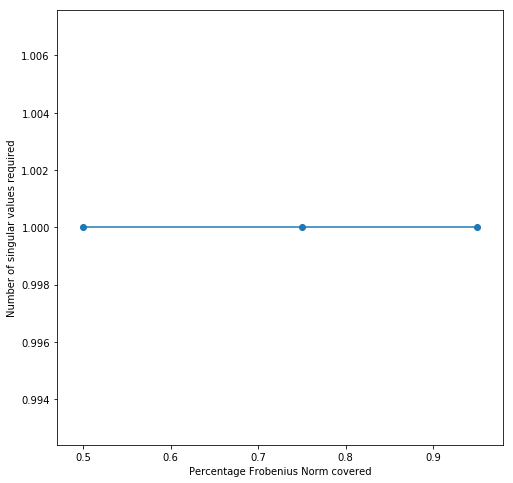

In [15]:
# Plotting the variance captured vs the number of singular vectors required to capture the variance
plt.figure(figsize=[8,8])
plt.scatter(percentage_captured, singular_values)
plt.plot(percentage_captured, singular_values)
plt.xlabel('Percentage Frobenius Norm covered')
plt.ylabel('Number of singular values required')
plt.show()

#### Observations

We can see that since the columns are highly correlated a single singular value is able to capture upto 95% variance, whereas we will see later on that when the features are uncorrelated, we require upto 40 singular values to capture 95% variance

## Case 2: Uncorrelated Matrix

#### Creation of Matrix 

In [16]:
# Creating a 100x100 matrix with numbers between 0 and 1
np.random.seed(10)
A = np.matrix(np.random.random_sample([100,100]))

#### Singular Value Decompostion

In [17]:
U,s,V = SVD(A) # Performing SVD using the above defined function

In [18]:
np.corrcoef(A)
print('We can see that the columns of A are not statistically correlated')

We can see that the columns of A are not statistically correlated


In [19]:
A

matrix([[0.77132064, 0.02075195, 0.63364823, ..., 0.44077382, 0.31827281,
         0.51979699],
        [0.57813643, 0.85393375, 0.06809727, ..., 0.80356835, 0.3512135 ,
         0.09344038],
        [0.81331608, 0.78486672, 0.39341911, ..., 0.64522775, 0.0566282 ,
         0.2974841 ],
        ...,
        [0.84309087, 0.90138884, 0.71636679, ..., 0.48460966, 0.47101209,
         0.88271114],
        [0.31639481, 0.88949712, 0.28821348, ..., 0.29401386, 0.16887179,
         0.49584786],
        [0.5710414 , 0.60181792, 0.56677567, ..., 0.0050953 , 0.3826363 ,
         0.89368739]])

In [20]:
U*np.diag(s)*V.T

matrix([[0.77132064, 0.02075195, 0.63364823, ..., 0.44077382, 0.31827281,
         0.51979699],
        [0.57813643, 0.85393375, 0.06809727, ..., 0.80356835, 0.3512135 ,
         0.09344038],
        [0.81331608, 0.78486672, 0.39341911, ..., 0.64522775, 0.0566282 ,
         0.2974841 ],
        ...,
        [0.84309087, 0.90138884, 0.71636679, ..., 0.48460966, 0.47101209,
         0.88271114],
        [0.31639481, 0.88949712, 0.28821348, ..., 0.29401386, 0.16887179,
         0.49584786],
        [0.5710414 , 0.60181792, 0.56677567, ..., 0.0050953 , 0.3826363 ,
         0.89368739]])

We see that using SVD, we are able to successfully decompose the matrix A

#### Compute Frobenius norm of matrix A

Frobenius norm = Sum of squares of elements of matrix = Sum of squares of singular values = Sum of eigenvalues

In [21]:
frobenius_A = 0
for i in range(100):
    for j in range(100):
        frobenius_A = frobenius_A + (A[i,j])**2 # Summing squares of all elements of the matrix

In [22]:
print('The frobenius norm of A is {}'.format(frobenius_A))

The frobenius norm of A is 3258.759353368367


In [23]:
print('The frobenius norm of A is {}'.format(sum(s**2))) # Summing all the squares of singular values of the matrix
print('We can see that Frobenius norm captured in the same as sum of eigenvalues/ sum of squares of singular values')

The frobenius norm of A is 3258.7593533683666
We can see that Frobenius norm captured in the same as sum of eigenvalues/ sum of squares of singular values


#### What fraction of the Frobenius norm of A is captured by the top 10 singular vectors?

In [24]:
var_10  = 0 # Variance captured by top ten singular vectors 
var_all = 0 # Variance captured by all the singular vectors

for i in s[:10]:
    var_10 = var_10 + i**2 # Summing the squares of top ten singular values
for i in s:
    var_all = var_all + i**2 # Summing the squares of all singular values
    
print('Fraction captured by top ten singular vectors = {}'.format(var_10/var_all))

Fraction captured by top ten singular vectors = 0.8198568859837808


#### What fraction of the Frobenius norm of A is captured by the random 10 singular vectors?

In [25]:
np.random.seed(10)
s1 = s.copy()
np.random.shuffle(s1)

var_10  = 0 # Variance captured by random ten singular vectors 
var_all = 0 # Variance captured by all the singular vectors

for i in s1[:10]:
    var_10 = var_10 + i**2 # Summing the squares of random ten singular values
for i in s1:
    var_all = var_all + i**2 # Summing the squares of all singular values
    
print('Fraction captured by random ten singular vectors = {}'.format(var_10/var_all))

Fraction captured by random ten singular vectors = 0.03079346410359493


#### Plot a graph showing the number of singular vectors required to capture 50%, 75% & 95% of the data respectively? (Using the Frobenius norm)

In [26]:
var_n   = 0 # Variance captured till n% variance is reached
var_all = 0 # Variance captured by all singular vectors

n_50 = 0 # Number of singular vectors required to capture 50% variance
n_75 = 0 # Number of singular vectors required to capture 75% variance
n_95 = 0 # Number of singular vectors required to capture 95% variance

for i in s:
    var_all = var_all + i**2
    
for i in range(len(s)):
    var_n = var_n + (s[i])**2
    if var_n >= var_all*0.5:
        n_50 = i+1 # If variance exeeds 50%, we set n_50 to number of singular vectors required to capture it.
        break


var_n = 0
for i in range(len(s)):
    var_n = var_n + (s[i])**2
    if var_n >= var_all*0.75:
        n_75 = i+1 # If variance exeeds 75%, we set n_75 to number of singular vectors required to capture it.
        break
    
var_n = 0
for i in range(len(s)):
    var_n = var_n + (s[i])**2
    if var_n >= var_all*0.95:
        n_95 = i+1 # If variance exeeds 95%, we set n_95 to number of singular vectors required to capture it.
        break
        


In [27]:
singular_values = [n_50,n_75,n_95]
percentage_captured = [0.5,0.75,0.95]
print(singular_values)

[1, 2, 40]


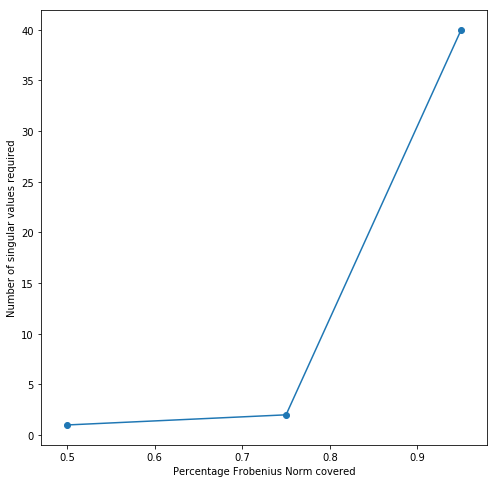

In [28]:
# Plotting variance captured vs Number of singular values required to capture the required variance
plt.figure(figsize=[8,8])
plt.scatter(percentage_captured, singular_values)
plt.plot(percentage_captured, singular_values)
plt.xlabel('Percentage Frobenius Norm covered')
plt.ylabel('Number of singular values required')
plt.show()

#### Observations:
We see that very few singular values are required to capture most part of the variance. But as we saturate to capturing more than around 90% of the variance, we require large amount of singular values, unlike in the case of highly correlated data where a single singular vector can capture upto 95% variance